In [322]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP


In [323]:
import pandas as pd
import mne

In [324]:

import os.path as op

import mne
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage

# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)

# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = op.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')

0 files missing from /opt/conda/lib/python3.7/site-packages/mne/datasets/_fsaverage/root.txt in /home/amplifier/mne_data/MNE-fsaverage-data
0 files missing from /opt/conda/lib/python3.7/site-packages/mne/datasets/_fsaverage/bem.txt in /home/amplifier/mne_data/MNE-fsaverage-data/fsaverage


In [325]:
p=['SG01','SG02','SG03','SG04','SG05','SG06','SG07','SG08','SG09','SG10','SG11','SG12','SG14','SG15','SG16']

In [326]:
file_names= ['SG01_motor_clean',
             'SG01_motor_im_clean',
             'SG01_motor_im_arms_legs_clean',
             
             'SG02_motor_clean',
             'SG02_motor_im_clean',
             'SG02_motor_im_arms_legs_clean',
             
             'SG03_motor_clean',
             'SG03_motor_im_clean',
             'SG03_motor_im_arms_legs_clean',
             
             
             'SG04_motor_clean',
             'SG04_motor_im_clean',
             'SG04_motor_im_arms_legs_clean',
             
             
             'SG05_motor_clean',
             'SG05_motor_im_clean',
             'SG05_motor_im_arms_legs_clean',
             
             'SG06_motor_im_clean',
             'SG06_motor_im_arms_legs_clean',
             'SG06_motor_im_clean_2',
             'SG06_motor_im_arms_legs_clean_2', 
             'SG06_motor_im_clean_3',
             
             'SG10_motor_clean',
             'SG10_motor_im_clean',
             #'SG10_motor_clean_2',
             'SG10_motor_im_clean_2',
             'SG10_motor_im_arms_legs_clean_2',
             
             'SG11_motor_clean',
             'SG11_motor_im_clean',
             'SG11_motor_im_arms_legs_clean',
             
             
             'SG12_motor_clean',
             'SG12_motor_im_clean',
             'SG11_motor_1_clean',
             'SG11_motor_2_clean',
             'SG11_motor_3_clean',
             'SG11_motor_all',
             'SG12_motor_all',
             'SG14_motor_all',
             'SG15_motor_all',
             'SG16_motor_all'
            
            ]#,
             #'SG12_motor_im_arms_legs_clean',
             #'SG12_motor_clean_2']

In [327]:
events_dict= {
    
    'SG01_motor_clean': { 'Right Hand': 4,'Rest': 6, 'Right leg': 7, 'Left leg': 8, 'Left hand':9},
    'SG01_motor_im_clean':{'Left_hand':4, 'Rest': 6, 'Right_hand': 7, 'Right_leg': 8, 'Left_leg': 9},
    'SG01_motor_im_arms_legs_clean': {'Hands':4,'Legs':6,'Rest':7},
    
    'SG02_motor_clean': { 'Rest':2 , 'Left leg':4 ,  'Right leg':5, 'Left hand':6,'Right hand':7},
    'SG02_motor_im_clean':{ 'Right_leg':2, 'Rest':4, 'Left_leg':5, 'Left_hand':6, 'Righ_hand':7},
    'SG02_motor_im_arms_legs_clean': {'Legs':2, 'Hands':4, 'Rest':5},
    
    'SG03_motor_clean': { 'Left_Hand':1, 'Rest':3,'Left leg':4, 'Right leg':5,'Right hand':6},
    'SG03_motor_im_clean':{ 'Left_hand':1,'Left_leg':3, 'Right_hand':4, 'Right_leg':5, 'Rest':6},
    'SG03_motor_im_arms_legs_clean': {'Rest':2, 'Hands':4, 'Legs':5},
    
    'SG04_motor_clean': {'Right hand':2, 'Left leg':4, 'Left hand':5,'Rest':6, 'Right leg:':7},
    'SG04_motor_im_clean': {'Left leg':2, 'Rest':4, 'Right_hand':5, 'Right_leg':6, 'Left hand:':7},
    'SG04_motor_im_arms_legs_clean': {'Legs':2 , 'Hands':4 , 'Rest':5},
    
    'SG05_motor_clean': {'Left_Hand':2, 'Right_hand':4, 'Rest':5,'Right_leg':6, 'Left_leg':7},
    'SG05_motor_im_clean': {'Left_hand':2, 'Left_leg':4, 'Right_leg':5, 'Right_hand':6, 'Rest':7},
    'SG05_motor_im_arms_legs_clean': {'Legs':2 , 'Hands':4 , 'Rest':5},
    
        
    'SG06_motor_im_clean':{'Right_leg':1, 'Left_leg':3, 'Left_hand':4, 'Rest':5, 'Right_hand':6},
    'SG06_motor_im_arms_legs_clean': { 'Legs':2, 'Rest':4, 'Hands':5 },
    'SG06_motor_im_clean_2': {'Rest':2, 'Right_leg':4, 'Right_hand':5,'Left_leg':6,'Left_hand':7},
    'SG06_motor_im_arms_legs_clean_2': {'Legs':2, 'Hands':4, 'Rest':5},
    'SG06_motor_im_clean_3': {'Rest':2, 'Left_hand':4, 'Left_leg':5,'Right_leg':6,'Right_hand':7},
    
    
    'SG10_motor_clean':{'Right_Hand':2,'Left_Hand':4,'Left_Leg':5,'Rest':6,'Right_Leg':7},
    'SG10_motor_im_clean':{'Left_Leg':2,  'Right_Hand':4, 'Rest':5, 'Left_Hand':6, 'Right_Leg':7},
    'SG10_motor_clean_2':{'Left_Leg':2, 'Pause':3, 'Right_Leg':4, 'Right_Hand':5,'Left_Hand':6,'Rest':7},
    'SG10_motor_im_clean_2':{ 'Left_Leg':2,  'Right_Leg':4, 'Rest':5,  'Left_Hand':6, 'Right_Hand':7},
    'SG10_motor_im_arms_legs_clean_2': {'Rest':2, 'Legs':4, 'Hands':5},
    
    
    'SG11_motor_clean': {'Right_Leg':2,'Left_Leg':4,'Rest':5,'Right_Hand':6,'Left_Hand':7},
    'SG11_motor_im_clean':{'Left_Leg':2,  'Right_Leg':4, 'Left_Hand':5,  'Rest':6,'Right_Hand':7} ,
    'SG11_motor_im_arms_legs_clean': {'Hands':2, 'Legs':4, 'Rest':5},
             
             
    'SG12_motor_clean':{'Rest':2,'Left_Leg':4,'Left_Hand':5,'Right_Leg':6,'Right_Hand':7},
    'SG12_motor_im_clean':{'Rest':2,'Left_Leg':4,'Left_Hand':5,'Right_Leg':6,'Right_Hand':7},
    'SG12_motor_im_arms_legs_clean':{'Legs':2, 'Hands':4,'Rest':5},
    'SG12_motor_clean_2': {'Right_Hand':2, 'Left_Hand':4, 'Rest':5, 'Left_Leg':6,'Right_Leg':7},
    
    'SG11_motor_1_clean': {'Right_Hand':12,'Left_Hand':14,'Right_Leg':15,'Left_Leg':16,'Rest':17},
    'SG11_motor_2_clean': {'Right_Hand':12,'Left_Hand':14,'Right_Leg':15,'Left_Leg':16,'Rest':17},
    'SG11_motor_3_clean': {'Right_Hand':12,'Left_Hand':14,'Right_Leg':15,'Left_Leg':16,'Rest':17},
    
    'SG11_motor_all': {'Right_Hand':12,'Left_Hand':14,'Right_Leg':15,'Left_Leg':16,'Rest':17},
    'SG12_motor_all': {'Right_Hand':12,'Left_Hand':14,'Right_Leg':15,'Left_Leg':16,'Rest':17},
    'SG14_motor_all': {'Right_Hand':12,'Left_Hand':14,'Right_Leg':15,'Left_Leg':16,'Rest':17},
    'SG15_motor_all': {'Right_Hand':12,'Left_Hand':14,'Right_Leg':15,'Left_Leg':16,'Rest':17},
    'SG16_motor_all': {'Right_Hand':12,'Left_Hand':14,'Right_Leg':15,'Left_Leg':16,'Rest':17},
}
    
    

In [328]:
from sklearn.model_selection import StratifiedShuffleSplit

In [329]:
def events_matrix_from_list(stim_initial):
    events_matrix=[]
    for i in range(1,len(stim_initial)):
        if stim_initial[i]!=stim_initial[i-1]:
            events_matrix.append([i,0,str(int(stim_initial[i]))])
        
    events_matrix=np.array(events_matrix)
    
    return events_matrix.astype(int)

In [363]:
file_names[36]

'SG16_motor_all'

In [365]:
df=pd.DataFrame(columns=['time','window','bias','tasks','csp_len','subject','acc'])

for i in range(36,37):
    
    file_name=file_names[i]

    if file_name[:4] in p:
        subject = file_name[:4]

    tmin, tmax = 0., 6.
    event_id = events_dict[file_name]


    raw=mne.io.read_raw_fif('Subjects/'+subject+'/'+file_name+ '.fif',preload=True)
    
    
    stim_initial= np.genfromtxt('Subjects/'+subject+'/'+file_name + '_marks.csv', delimiter=',')

    events_matrix=events_matrix_from_list(stim_initial)
    #raw.set_eeg_reference('average',projection=True)
    raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')
    

    epochs = Epochs(raw, events_matrix, event_id, tmin, tmax, proj=True,
                    baseline=None, preload=True)
    
    if len(epochs)<25:
        train_idx_s=[np.arange(6,len(epochs)),  np.concatenate([np.arange(0,6),np.arange(12,len(epochs))]),  np.concatenate([np.arange(0,12),np.arange(18,len(epochs))])  ,np.arange(0,len(epochs)-6)]
        test_idx_s=[np.arange(0,6)           ,  np.arange(6,12)                                           ,  np.arange(12,18)                                             ,np.arange(len(epochs)-6,len(epochs))]

    else:
        train_idx_s=[np.arange(10,len(epochs)),  np.concatenate([np.arange(0,10),np.arange(20,len(epochs))]),  np.concatenate([np.arange(0,20),np.arange(30,len(epochs))])  ,np.arange(0,len(epochs)-10)]
        test_idx_s=[np.arange(0,10)           ,  np.arange(10,20)                                           ,  np.arange(20,30)                                             ,np.arange(len(epochs)-10,len(epochs))]

    
    
    epochs_train_tmin=0
    epochs_train_tmax=6



    epochs_train = epochs.copy().crop(tmin=epochs_train_tmin, tmax=epochs_train_tmax)
    labels = epochs.events[:, -1] - 2

    scores = []
    epochs_data = epochs.get_data()
    epochs_data_train = epochs_train.get_data()

    #cv = ShuffleSplit(10, test_size=0.2, random_state=42)
    #cv_split = cv.split(epochs_data_train)

    # Assemble a classifier
    lda = LinearDiscriminantAnalysis()
    csp = CSP(n_components=4, reg=0.1, log=True, norm_trace=False)

    # Use scikit-learn Pipeline with cross_val_score function
    clf = Pipeline([('CSP', csp), ('LDA', lda)])
    scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)

    # Printing the results
    class_balance = np.mean(labels == labels[0])
    class_balance = max(class_balance, 1. - class_balance)
    print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                              class_balance))


    # plot CSP patterns estimated on full data for visualization
    #csp.fit_transform(epochs_data, labels)

    #csp.plot_patterns(epochs.info, ch_type='eeg', units='Patterns (AU)', size=1.5)


    window=2
    step=0.05

    sfreq = raw.info['sfreq']
    w_length = int(sfreq * window)   # running classifier: window length
    w_step = int(sfreq * step)  # running classifier: window step size
    w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

    scores_windows = []

    w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin
    
    if i in (0,3,6,12,24,27):
        task='ME'
    
    elif i in (1,4,7,13,25,28):
        task='MI'
    
    elif i in (2,5,8,14,26):
        task='MI_Hands_Feet'
    
    
    cv = StratifiedShuffleSplit(4, test_size=0.25, random_state=43)
    cv_split = cv.split(epochs_data_train,labels)

    
    for train_idx, test_idx in cv_split:
    #for tr_ind in range(len(train_idx_s)):
        
        #train_idx=train_idx_s[tr_ind]
        #test_idx=test_idx_s[tr_ind]  
        print(train_idx)
        print(test_idx)
        
        y_train, y_test = labels[train_idx], labels[test_idx]

        X_train = csp.fit_transform(epochs_data_train[train_idx], y_train)
        X_test = csp.transform(epochs_data_train[test_idx])

        # fit classifier
        lda.fit(X_train, y_train)

        # running classifier: test classifier on sliding window
        score_this_window = []
        for k in range(len(w_start)):
            n=w_start[k]
            X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
            score_this_window.append(lda.score(X_test, y_test))
            
            
                
            
            one_row=[w_times[k],window,step,task, str(epochs_train_tmin)+' '+str(epochs_train_tmax),subject,lda.score(X_test, y_test)]
            ind=len(df)
            df.loc[ind]=one_row

        

        scores_windows.append(score_this_window)
    #np.save('CSP_results/CSP_results'+str(i), np.array(scores_windows))
    
#df.to_pickle('CSP_results_our_data_SG12.pkl') 

<ipython-input-365-8099ede00e54>:14: RuntimeWarning: This filename (Subjects/SG16/SG16_motor_all.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw=mne.io.read_raw_fif('Subjects/'+subject+'/'+file_name+ '.fif',preload=True)


Classification accuracy: 0.361111 / Chance level: 0.800000
[ 67  26  70  47  22  41  36  29   3  52   4  77  23   8  30  24  91  40
  98  18  83 103  48  68  34  21  60  43  92  10  94  79  51  49  88   0
  15  19  32  89  63   2  33  95  86  28  17  39  38  20  85  12  11  16
  75  64  57  45  25  93  82  46   1 102  54 104  27  74   7  96  55  97
  87   9  99  69  65  78]
[ 53  42   6  44  59  80  14  62  72   5  31  90  13  81  66  58  37 101
  35  56  71  61  73 100  50  76  84]
[ 42   1  66 100  46  18  50  87  63  93  17   3  53  22  74  20   5  21
   8  43   0   6  39  84  56  71  77  34  26  40  67  15   7  13  30  25
  96   2  65  31  61  23  44  41  29  91  59  83  68  69  51  86  90  82
  33  28 103  92  88  64  24   9  98  70 102  81  16  97 104  48 101  85
  47  54  78  79  27  14]
[36 55 94 19 11 35 75 49 57 73 76 62 32 10 89 45 12 99 38 60 58 37  4 72
 95 52 80]
[  5   7  20  79  53  41  30  67 104  23  38   0  29  55  16  86   4  25
  26  72  93 103  15  66  88 100  92 

In [367]:
np.save('Individual_accuracy/CSP_SG16.npy', np.array(scores_windows))

In [316]:

len(train_idx)

78

In [317]:
epochs_data[test_idx][:, :, n:(n + w_length)].shape

(27, 32, 500)

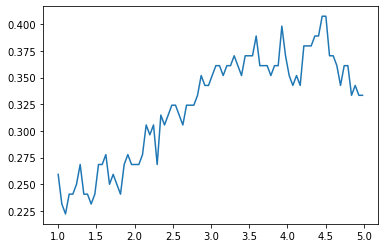

In [366]:
plt.plot(w_times, np.mean(np.array(scores_windows),0))

In [182]:
df_analysis=df[df['time']<4]

In [183]:
df_analysis.groupby('tasks').mean()

,time,bias,acc
tasks,,,
ME,2.488,0.05,0.344048
MI,2.488,0.05,0.243254


In [181]:
df_analysis.groupby('tasks').mean()

,time,bias,acc
tasks,,,
ME,2.488,0.05,0.293651


In [79]:
test_idx_s

[array([0, 1, 2, 3, 4, 5]),
 array([ 6,  7,  8,  9, 10, 11]),
 array([12, 13, 14, 15, 16, 17]),
 array([18, 19, 20, 21, 22, 23])]

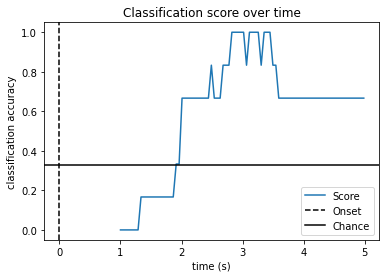

In [80]:
plt.figure()
plt.plot(w_times,np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.33, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')
plt.show()

np.save('CSP_results/CSP_results'+str(i), np.array(scores_windows))

# Много измерений

In [ ]:
file_names[i]

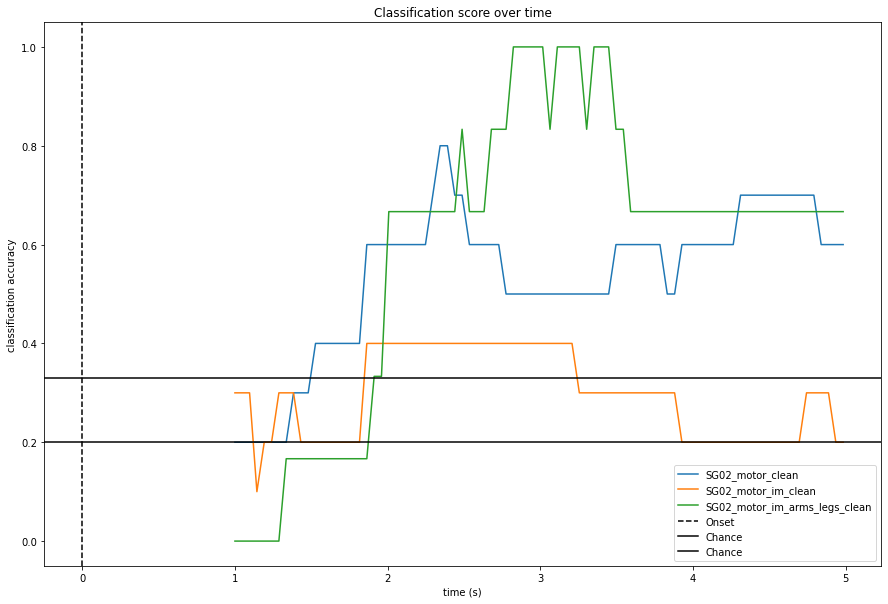

In [82]:
plt.figure(figsize=(15,10))
for i in range(3,6):
    
    scores_windows=np.load('CSP_results/CSP_results'+str(i)+'.npy')
    

    plt.plot(w_times,np.mean(scores_windows, 0), label=file_names[i])
    
    
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.2, linestyle='-', color='k', label='Chance')
plt.axhline(0.33, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')

plt.show()

In [126]:
scores_windows.shape

(1, 46)